**Data Set: Diabetes**

**Use Case: predict whether a person will have diabetes or not?**    

**diabets:** Diabetes is a chronic health condition that affects how your body turns food into energy. Most of the food you eat is broken down into sugar (also called glucose) and is then released into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin. Insulin acts like a key to let the blood sugar into your body’s cells for use as energy.  
If you have diabetes, your body isn’t able to properly process and use glucose from the food you eat. There are different types of diabetes, each with different causes, but they all share the common problem of having too much glucose in your bloodstream. Over time, that can cause serious health problems, such as heart disease, vision loss, and kidney disease.  
Thus, the diagnosis of the disease at an early stage plays a very significant role as the early prediction of the disease will minimize the health risks associated with the disease.   

# Importing important libraries & reading the Dataset

In [1]:
# Importing important liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#df = pd.read_csv(r'C:\Users\nomaniqbal\Desktop\Presentation\diabetes.csv')
#df.head(10)

df = pd.read_csv("https://raw.githubusercontent.com/thenomaniqbal/Diabetes-prediction/master/diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


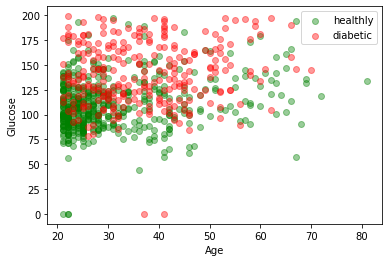

In [3]:
diabetics = df[df.Outcome == 1]
healthly = df[df.Outcome == 0]

# Make an example drawing by looking at gloucose:
# At the end of program, machine learning model will make a prediction by looking at all the other data, not just glucose.
plt.scatter(healthly.Age, healthly.Glucose, color="green", label="healthly", alpha = 0.4)
plt.scatter(diabetics.Age, diabetics.Glucose, color="red", label="diabetic", alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

# Explaining the data set

In [4]:
print("dimension of diabetes data: {}".format(df.shape))
print("n dimentions of diabetes data: {}".format(df.ndim))
print("size of diabetes data: {}".format(df.size))

dimension of diabetes data: (768, 9)
n dimentions of diabetes data: 2
size of diabetes data: 6912


We have a data set of 768 people who were or were not diagnosed with diabets.

There are eight input variables and one output variable (the last column). We will be learning a model to map rows of input variables (X) to an output variable (y), which we often summarize as y = f(X).  

The variables can be summarized as follows:

**Input Variables (X):**  

**Pregnancies**=Number of times pregnant  
**Glucose**=Plasma glucose concentration a 2 hours in an oral glucose tolerance test  
**BloodPressure**=Diastolic blood pressure (mm Hg)  
**SkinThickness**=Triceps skin fold thickness (mm)  
**Insulin**=2-Hour serum insulin (mu U/ml)  
**BMI**=Body mass index (weight in kg/(height in $(m)^2$)  
**DiabetesPedigreeFunction**=a function which scores likelihood of diabetes based on family history    
**Age**=Age (years)  

**Output Variables (y):**   

**Outcome**=Class variable (0 or 1)  


Once the CSV file is loaded into memory, we can split the columns of data into input and output variables.

The data will be stored in a 2D array where the first dimension is rows and the second dimension is columns, e.g. [rows, columns].

# Understanding the Data and statistical analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**“Outcome” is the feature we are going to predict, 0 means No diabetes, 1 means diabetes. Of these 768 data points, 500 are labeled as 0 and 268 as 1.**

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**df.describe()** method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values and ignoring categorical values. 
**count** tells us the number of NoN-empty rows in a feature.  
**mean** tells us the mean value of that feature.  
**std** tells us the Standard Deviation Value of that feature.  
**min** tells us the minimum value of that feature.  
**25%, 50%, and 75%** are the percentile/quartile of each features. This quartile information helps us to detect Outliers.  
**max** tells us the maximum value of that feature.  

On these columns, a value of zero does not make sense and thus indicates missing value.Following columns or variables have an invalid zero value- Glucose, BloodPressure, SkinThickness, Insulin & BMI.  
**It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values.**

**Furthermore, We can observe from the statistics that the maximum value of insulin is above 3 standard deviations that means there are more outliers in the insulin column so we will remove the data which is 2 standard deviations above.**

# Treatment of Mising Values

In [9]:
# Replace zeroes
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [10]:
for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)

In [11]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
for feature in zero_not_accepted:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Glucose 0.0065  % missing values
BloodPressure 0.0456  % missing values
SkinThickness 0.2956  % missing values
BMI 0.0143  % missing values
Insulin 0.487  % missing values


**To fill these Nan values the data distribution needs to be understood**

# Checking the distribution of the data

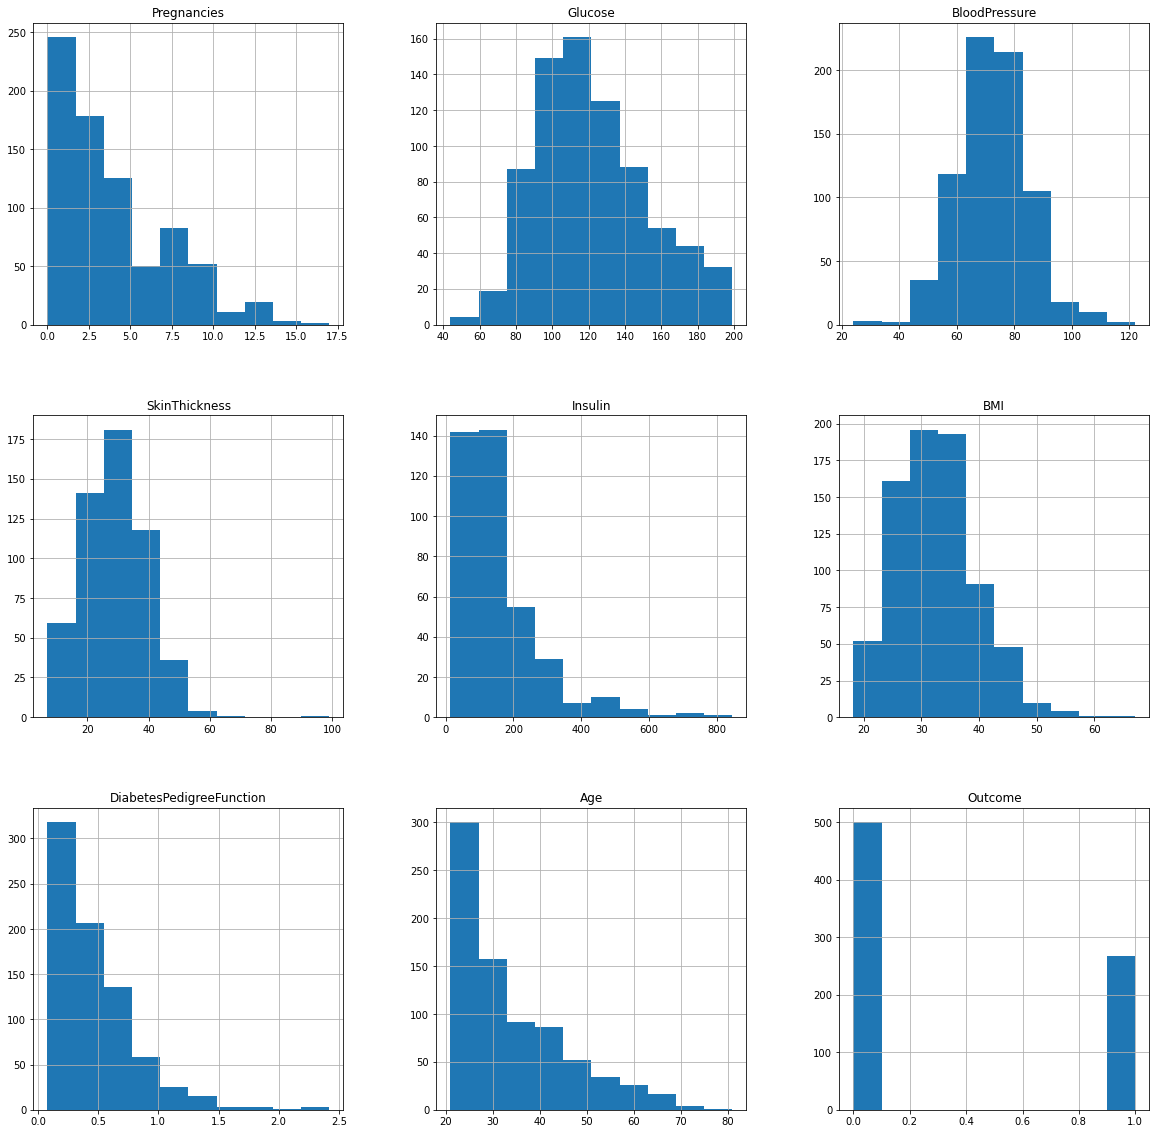

In [13]:
# Histogram of uncleaned data
fig = df.hist(figsize = (20,20))

In [14]:
for column in zero_not_accepted:
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN, mean)

values of columns like 'glucose', 'bloodpressure' cannot be accepted as zeroes because it will affect the outcome, we can replace such values with the mean of respective columns.

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.682292,30.435999,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,155.281250,85.021550,14.000,121.50000,155.0000,155.00000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Plotting after Nan removal**

([<matplotlib.patches.Wedge at 0x233d879a880>,
 [Text(1.0051884653130878, 1.9569353972989298, 'Diabetic'),
  Text(-1.0051882820915679, -1.9569354914114576, 'Healthy')],
 [Text(0.5482846174435024, 1.067419307617598, '34.9%'),
  Text(-0.5482845175044915, -1.067419358951704, '65.1%')])

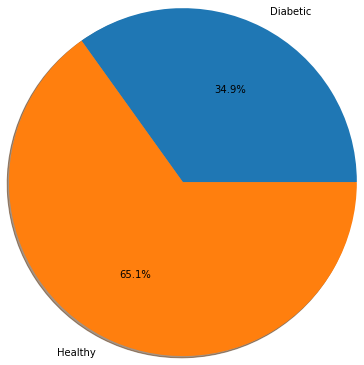

In [17]:
# proportion of diabetes patients and healthy person
list_diabetes=[268,500]
list_labels=['Diabetic','Healthy']
plt.axis('equal')
plt.pie(list_diabetes,labels=list_labels,radius=2,autopct="%0.1f%%",shadow=True)

**The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients**

<AxesSubplot:xlabel='BMI', ylabel='Density'>

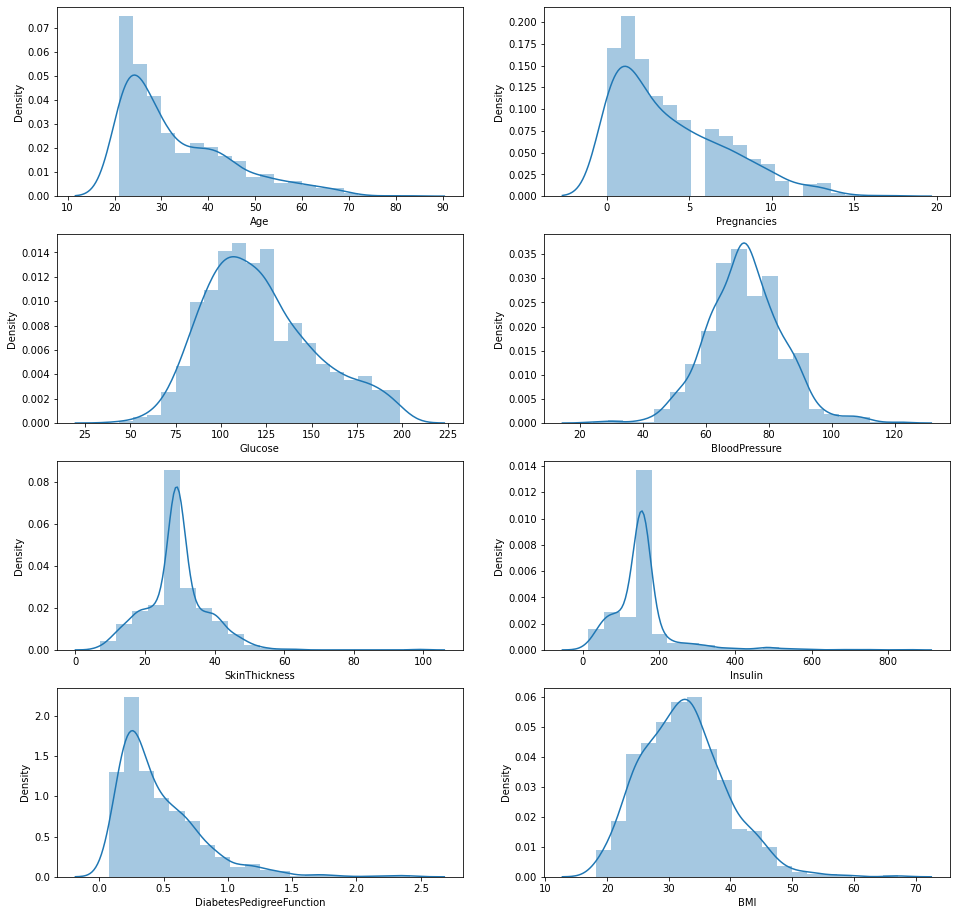

In [18]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

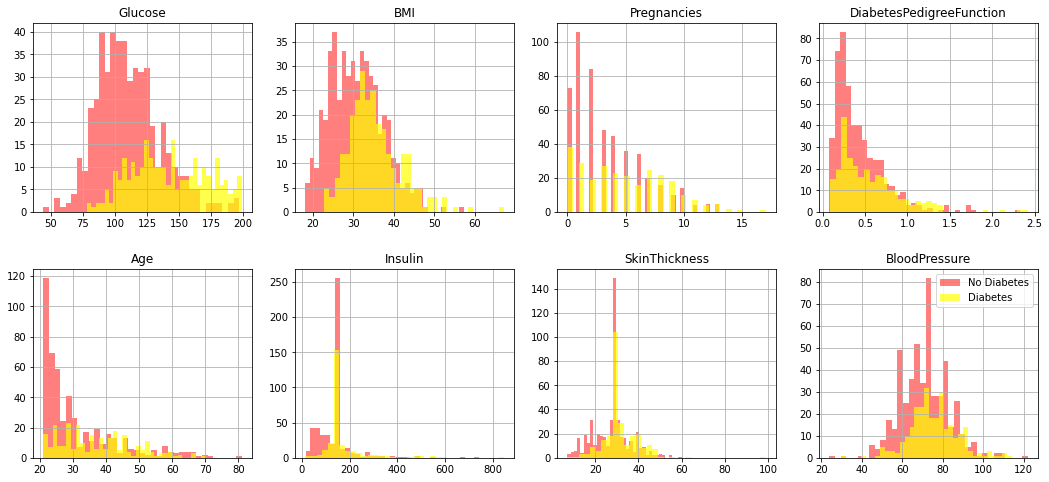

In [19]:
# To analyse feature-outcome distribution in visualisation
features = ['Glucose', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'SkinThickness', 'BloodPressure']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
    df[df.Outcome==0][feature].hist(bins=35, color='red', alpha=0.5, ax=ax[row, col]).set_title(feature)
    df[df.Outcome==1][feature].hist(bins=35, color='yellow', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)

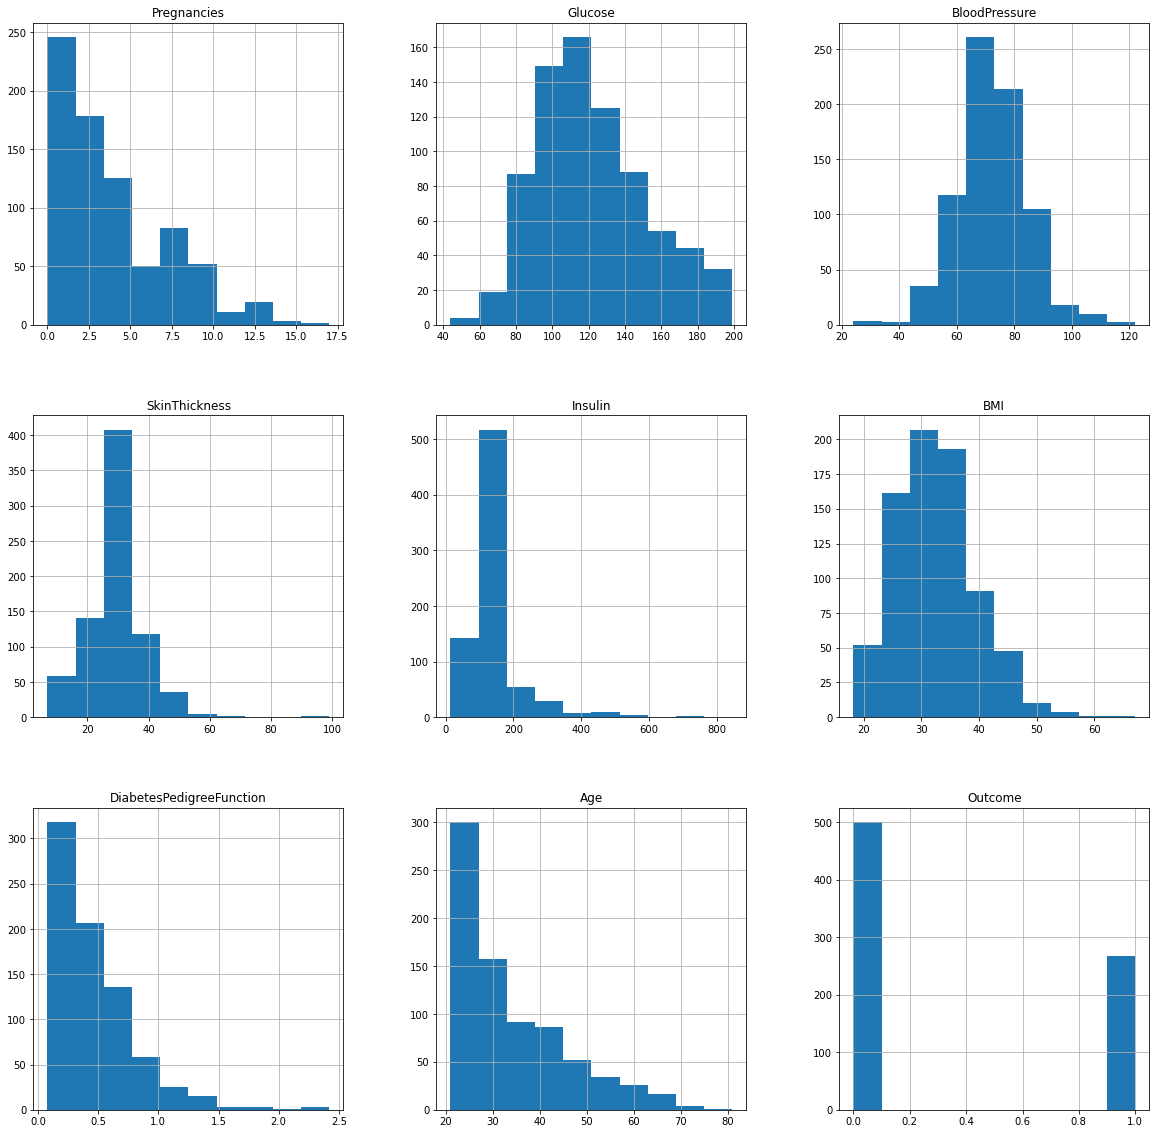

In [20]:
fig = df.hist(figsize = (20,20))

**Skewness**  
A **left-skewed distribution** has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A **right-skewed distribution** has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.

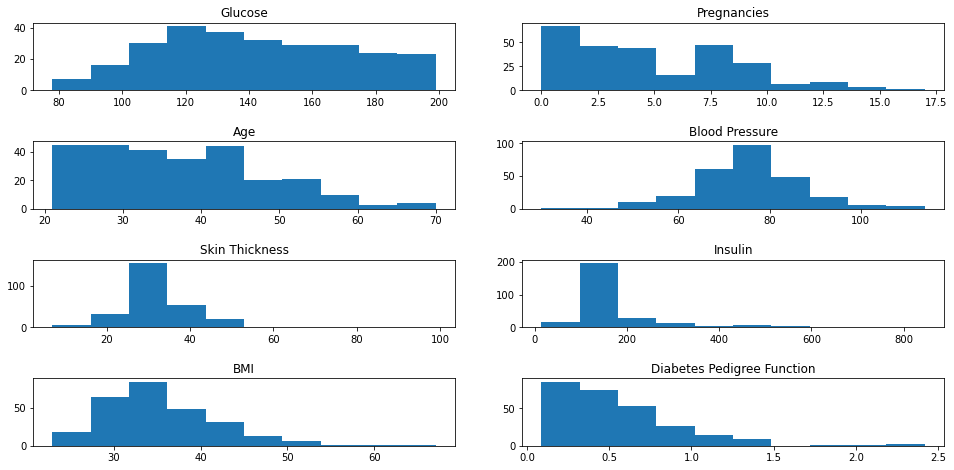

In [21]:
# Histogram of all coloumns when the Outcome is 1( has Diabetes)
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(14, 7))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(df.Glucose[df.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(df.Pregnancies[df.Outcome==1]);
ax[1,0].set_title('Age')
ax[1,0].hist(df.Age[df.Outcome==1]);
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(df.BloodPressure[df.Outcome==1]);
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(df.SkinThickness[df.Outcome==1]);
ax[2,1].set_title('Insulin')
ax[2,1].hist(df.Insulin[df.Outcome==1]);
ax[3,0].set_title('BMI')
ax[3,0].hist(df.BMI[df.Outcome==1]);
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(df.DiabetesPedigreeFunction[df.Outcome==1]);

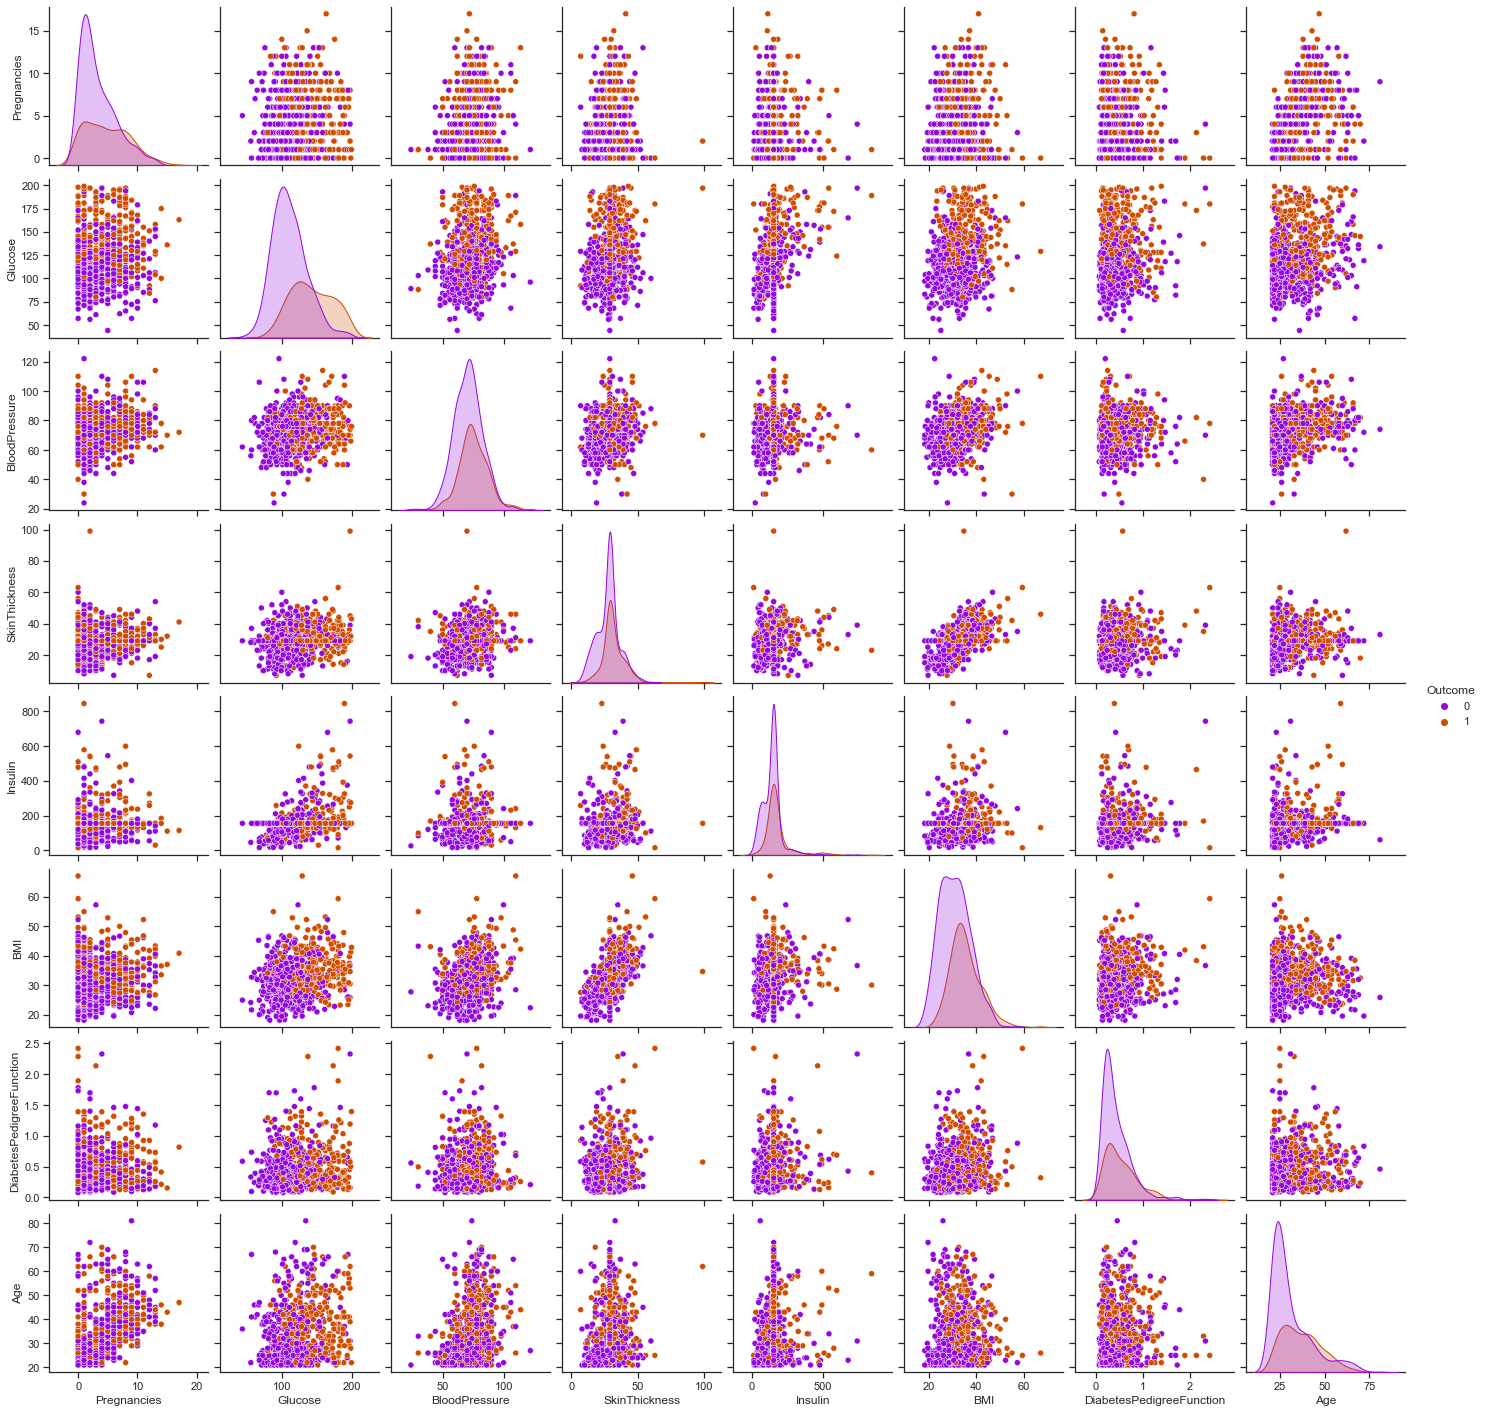

In [22]:
# Pair plot for clean data
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,hue='Outcome',palette='gnuplot');

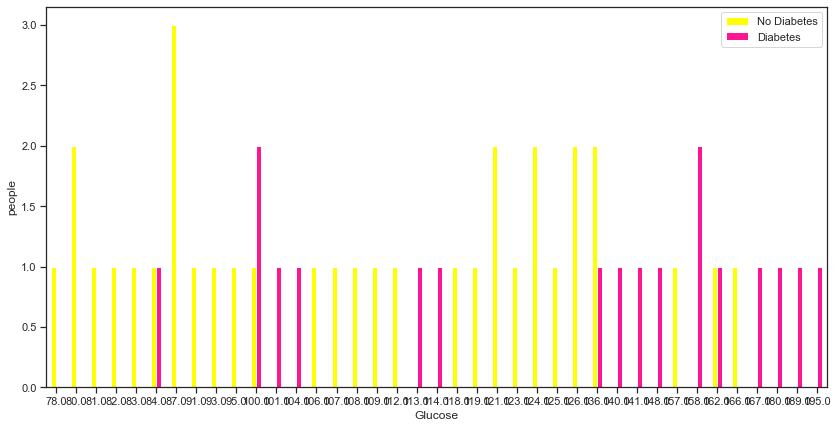

In [23]:
# Comparing Glucose with the Outcome
pd.crosstab(df.Glucose[::15],df.Outcome).plot(kind="bar",figsize=(14,7),color=["yellow","deeppink"])
plt.ylabel("people");
plt.xticks(rotation=0);
plt.legend(['No Diabetes', 'Diabetes']);

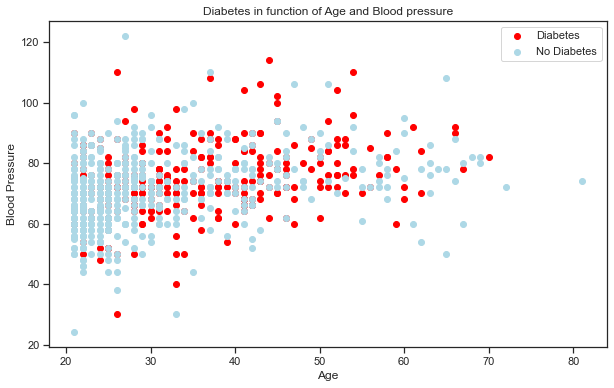

In [24]:
#find out Blood Pressure and age of entries who have diabetes
plt.figure(figsize=(10,6))
# Scatter with positive example
plt.scatter(df.Age[df.Outcome==1],df.BloodPressure[df.Outcome==1],c="Red");
# Scatter with negative example
plt.scatter(df.Age[df.Outcome==0],df.BloodPressure[df.Outcome==0],c="lightblue");
# Add some helpful info
plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"]);

# Explorning data to know relation before processing

**Correlation Matrix**  
A correlation matrix is a table showing correlation coefficients between sets of variables. Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj). This allows you to see which pairs have the highest correlation.

In [25]:
# extracting independent variables
X = df.iloc[:,0:8]
# extracting dependent variable
y = df.iloc[:,8]

In [26]:
#Pearson Correlation Cofficient
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127957,0.208615,0.081770,0.055478,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127957,1.000000,0.218615,0.192677,0.420301,0.231470,0.137100,0.266591,0.492911
BloodPressure,0.208615,0.218615,1.000000,0.191892,0.072041,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192677,0.191892,1.000000,0.158133,0.543275,0.102188,0.126107,0.214873
Insulin,0.055478,0.420301,0.072041,0.158133,1.000000,0.166946,0.099170,0.136050,0.214278
BMI,0.021546,0.231470,0.281132,0.543275,0.166946,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137100,-0.002378,0.102188,0.099170,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266591,0.324915,0.126107,0.136050,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492911,0.165723,0.214873,0.214278,0.312249,0.173844,0.238356,1.000000


**It is clear from the above co-relation result that glucose it the most important feature**  

In [27]:
mask = np.zeros_like(df.corr())
traingle_indices=np.triu_indices_from(mask)
mask[traingle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

**Heatmap for the data**  
A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

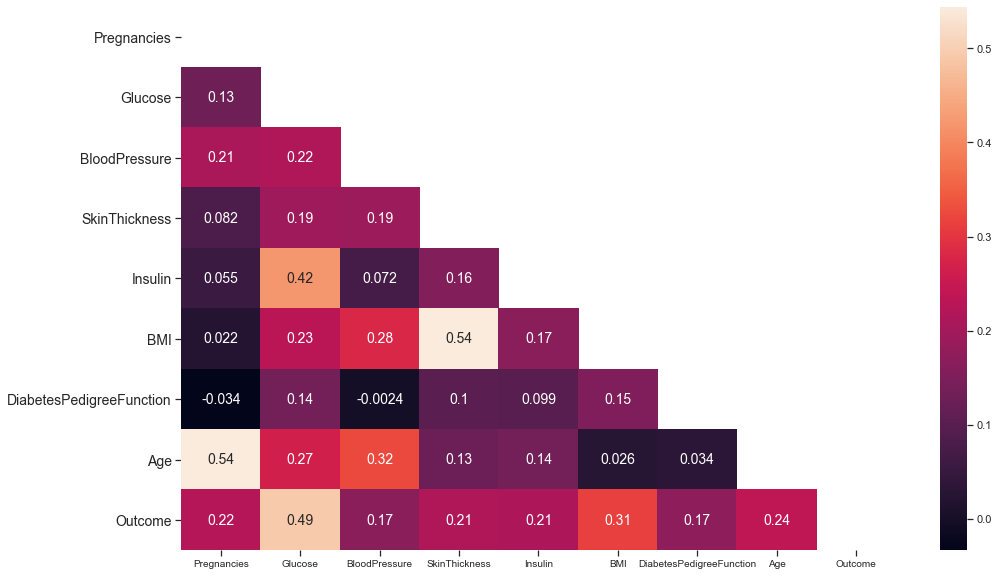

In [28]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),mask=mask, annot=True, annot_kws={"size" : 14})
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=14)
plt.show()

The heatmap indicates that the brighter the colors the higher the correlation and vice versa.

We can see that glucose is highly correlated to the dependent varaiable, which invariables means that the above medical facts is shown to be true in the given data.

Also, Insulin is the next correlated independent variable in the given data, but obviously does not correlate with outcome which medically is true because Insulin levels are used to predict the type of diabetes.

Based on these facts, the following conclusion is made:

That Glucose is the major predictor of diabetes Insulin is the major indicator of the type of daibetes

For the above reasons, only the glucose and insulin will be used to predict diabtes and type of diabetes.


<AxesSubplot:xlabel='Glucose', ylabel='count'>

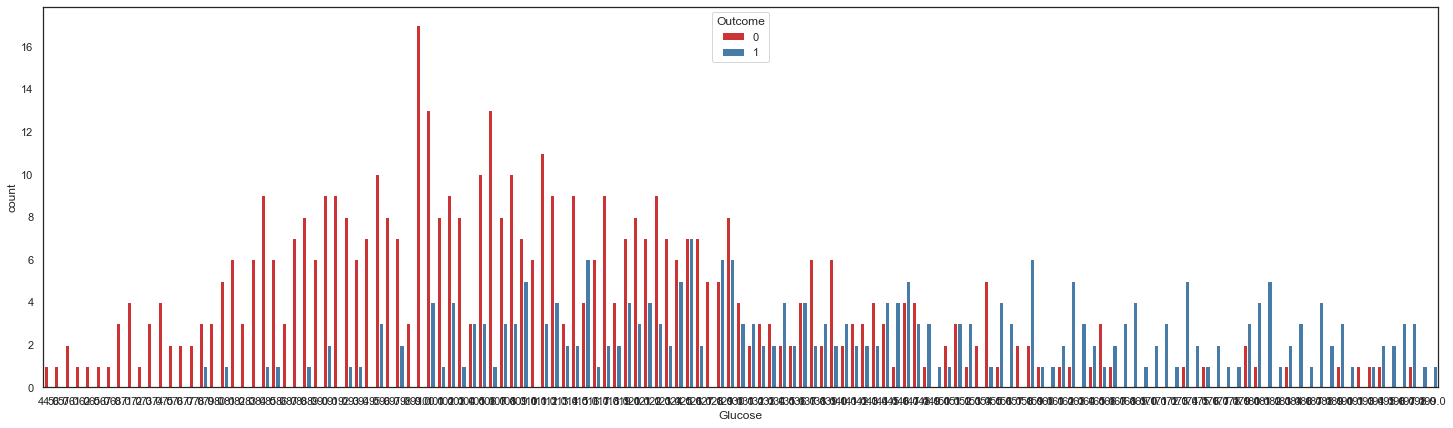

In [29]:
plt.figure(figsize=(25,7))
sns.countplot(x='Glucose',hue='Outcome', data=df, palette='Set1')

# Treatment of Outliers

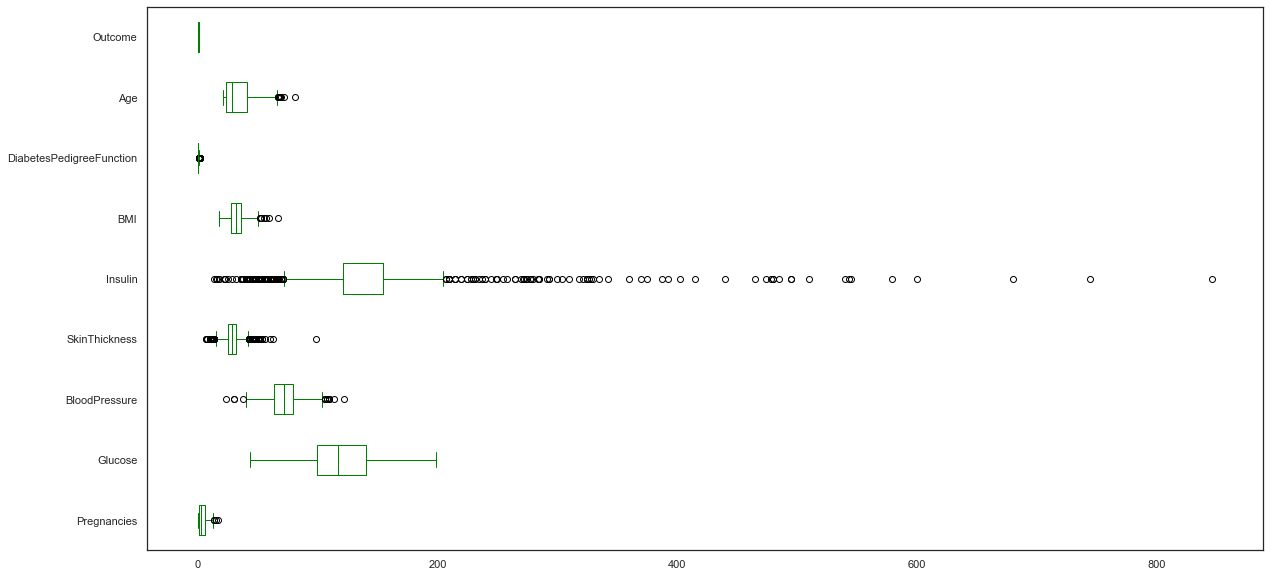

In [30]:
df.plot(kind='box',figsize=(20,10),color='Green',vert=False)
plt.show()

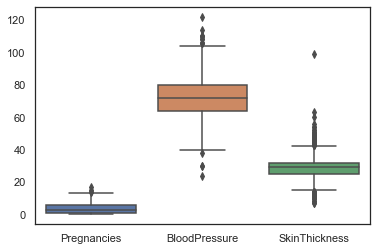

In [31]:
sns.boxplot(data=df.loc[:, ['Pregnancies','BloodPressure','SkinThickness']])
plt.show()

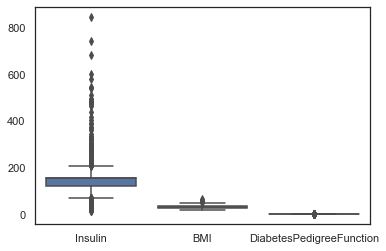

In [32]:
sns.boxplot(data=df.loc[:, ['Insulin','BMI','DiabetesPedigreeFunction']])
plt.show()

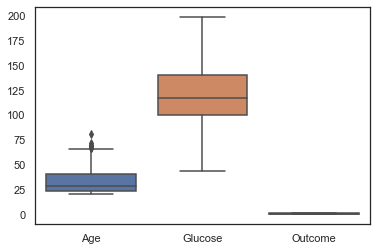

In [33]:
sns.boxplot(data=df.loc[:, ['Age','Glucose','Outcome']])
plt.show()

## Pregancies

In [34]:
q1 = df['Pregnancies'].quantile(0.25)
q3 = df['Pregnancies'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(-6.5, 13.5)

In [35]:
df['Pregnancies']=np.where(df['Pregnancies'] > upper_limit,upper_limit,df['Pregnancies']) 
# upper limit

## Blood Pressure

In [36]:
q1 = df['BloodPressure'].quantile(0.25)
q3 = df['BloodPressure'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(40.0, 104.0)

In [37]:
df['BloodPressure']=np.where(df['BloodPressure'] > upper_limit,upper_limit,df['BloodPressure'])
df['BloodPressure']=np.where(df['BloodPressure'] < Lower_limit,Lower_limit,df['BloodPressure'])

## SkinThickness

In [38]:
q1 = df['SkinThickness'].quantile(0.25)
q3 = df['SkinThickness'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(14.5, 42.5)

In [39]:
df['SkinThickness']=np.where(df['SkinThickness'] > upper_limit,upper_limit,df['SkinThickness'])
df['SkinThickness']=np.where(df['SkinThickness'] < Lower_limit,Lower_limit,df['SkinThickness'])

## Insulin

In [40]:
q1 = df['Insulin'].quantile(0.25)
q3 = df['Insulin'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(71.25, 205.25)

In [41]:
df['Insulin']=np.where(df['Insulin'] > upper_limit,upper_limit,df['Insulin'])
df['Insulin']=np.where(df['Insulin'] < Lower_limit,Lower_limit,df['Insulin'])

## BMI

In [42]:
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(13.849999999999998, 50.25)

In [43]:
df['BMI']=np.where(df['BMI'] > upper_limit,upper_limit,df['BMI'])

## DiabetesPedigreeFunction

In [44]:
q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(-0.32999999999999996, 1.2)

In [45]:
df['DiabetesPedigreeFunction']=np.where(df['DiabetesPedigreeFunction'] > upper_limit,upper_limit,df['DiabetesPedigreeFunction'])

## Age

In [46]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(-1.5, 66.5)

In [47]:
df['Age']=np.where(df['Age'] > upper_limit,upper_limit,df['Age'])

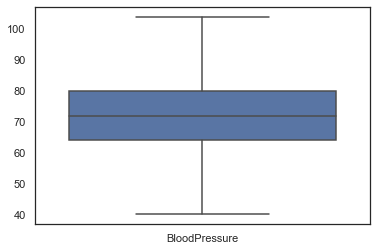

In [48]:
sns.boxplot(data=df.loc[:, ['BloodPressure']])
plt.show()

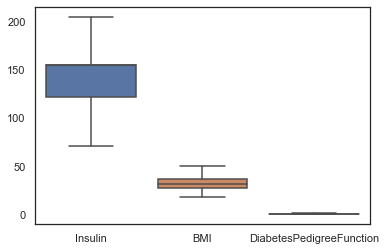

In [49]:
sns.boxplot(data=df.loc[:, ['Insulin','BMI','DiabetesPedigreeFunction']])
plt.show()

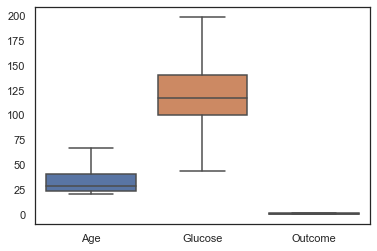

In [50]:
sns.boxplot(data=df.loc[:, ['Age','Glucose','Outcome']])
plt.show()

# Splitting the Data

**Scaling the data**  
It is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.  

**Train Test Split**  
To give a model a fair assessment, we’d like to know how well our data would perform on data it hasn’t seen yet.
In action, our model will be making predictions on data we don’t know the answer to, so we'd like to evaluate how well our model does on new data, not just the data it's already seen. To simulate making predictions on new unseen data, we can break our dataset into a training set and a test set. The training set is used for building the models. The test set is used for evaluating the models. We split our data before building the model, thus the model has no knowledge of the test set and we'll be giving it a fair assessment.  

**Cross Validation**  
When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

**About Stratify**
Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [51]:
# Dividing data into train and test dataset

#Feature scaling
#standardization

sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Glucose',  'Age', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure', 'Insulin', 'SkinThickness'])

y = df.Outcome

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3, random_state=42, stratify=y)

X.head(15)

,Glucose,Age,BMI,Pregnancies,DiabetesPedigreeFunction,BloodPressure,Insulin,SkinThickness
0,0.647150,0.865254,-0.030632,0.824667,0.292002,0.181733,0.588927,1.445691
1,-0.848970,-1.206013,-0.543914,0.017945,0.292002,-0.868800,-0.378101,-0.189304
2,1.245598,2.015957,-0.715008,0.017945,0.292002,-1.364051,0.746595,-0.103252
3,-0.848970,-1.074504,-0.543914,-0.788777,-1.272288,-0.643686,-1.022787,-1.049828
4,-1.148194,0.503604,-2.768136,0.824667,0.625375,1.607456,2.596563,-0.017199
5,0.347926,-0.186818,0.140462,0.017945,0.292002,-1.018876,-0.903661,-0.275356
6,-0.250522,-1.436153,-1.912666,0.421306,-1.426152,-0.208465,-0.738985,-0.619566
7,1.844045,-0.219695,-0.030632,0.017945,0.292002,0.436862,-1.138410,-0.361409
8,-0.549746,2.476238,-0.201726,1.833069,1.580618,-0.283503,-1.054321,1.703848
9,1.245598,0.109077,2.022496,0.017945,0.292002,-0.058389,-0.795045,1.789900


In [52]:
import math
math.sqrt(len(y_test))

16.0

In [53]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i, p=2, metric='euclidean')
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [54]:
# score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [55]:
# score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 78.515625 % and k = [13]


In [56]:
firstModel = max_test_score
print('Maximum test score', max_test_score)

Maximum test score 0.78515625


# To identify the best value of K

In [57]:
from sklearn.metrics import accuracy_score
for K in range(15):
    K_value = K+1
    knn2 = KNeighborsClassifier(n_neighbors = K_value, p=2, metric='euclidean')
    knn2.fit(X_train, y_train)
    y_pred = knn2.predict(X_test)
    print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:", K_value)

Accuracy is  71.09375 % for K-Value: 1
Accuracy is  72.265625 % for K-Value: 2
Accuracy is  73.828125 % for K-Value: 3
Accuracy is  73.4375 % for K-Value: 4
Accuracy is  75.78125 % for K-Value: 5
Accuracy is  74.21875 % for K-Value: 6
Accuracy is  75.78125 % for K-Value: 7
Accuracy is  74.21875 % for K-Value: 8
Accuracy is  76.5625 % for K-Value: 9
Accuracy is  76.171875 % for K-Value: 10
Accuracy is  77.734375 % for K-Value: 11
Accuracy is  76.5625 % for K-Value: 12
Accuracy is  78.515625 % for K-Value: 13
Accuracy is  77.34375 % for K-Value: 14
Accuracy is  76.171875 % for K-Value: 15


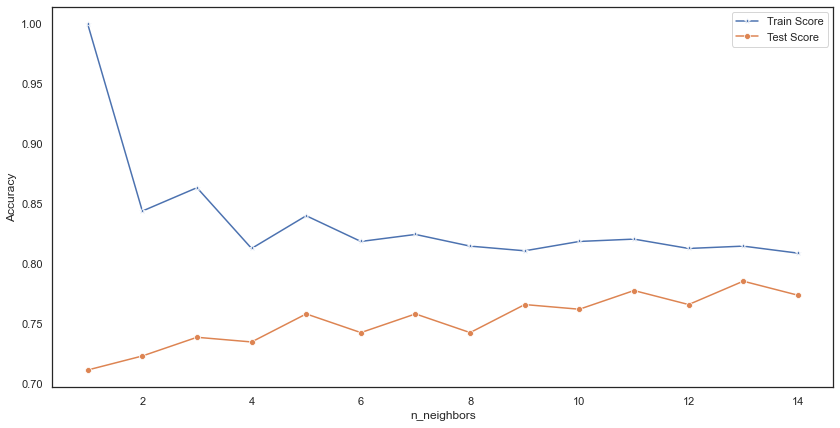

In [58]:
plt.figure(figsize=(14,7))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

The above plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. Considering if we choose one single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex. The best performance is somewhere around 13 neighbors.

**The best result is captured at k = 13 hence 13 is used for the final model**

In [59]:
#Setup a knn classifier with k neighbors
knn3 = KNeighborsClassifier(13, p=2, metric='euclidean')

knn3.fit(X_train,y_train)
#print(knn.score(X_test,y_test))
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn3.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn3.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.79


[0.7109375, 0.72265625, 0.73828125, 0.734375, 0.7578125, 0.7421875, 0.7578125, 0.7421875, 0.765625, 0.76171875, 0.77734375, 0.765625, 0.78515625, 0.7734375, 0.76171875, 0.7578125, 0.765625, 0.76953125, 0.765625, 0.765625, 0.78515625, 0.77734375, 0.78125, 0.76953125, 0.7890625, 0.77734375, 0.7734375, 0.7578125, 0.75390625, 0.73828125, 0.73828125]

 Average Accuracy: 0.7600806451612904


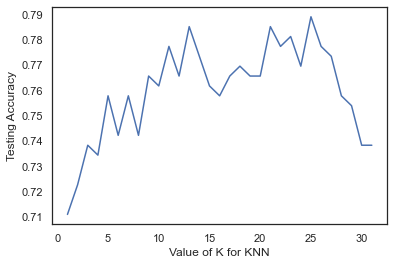

In [60]:
# try K=1 through K=31 and record testing accuracy
k_range = range(1, 32)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 32
# We append the scores in the dictionary
for i in k_range:
    knn4 = KNeighborsClassifier(n_neighbors=i)
    knn4.fit(X_train, y_train)
    y_pred = knn4.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

print(scores)

print ("\n Average Accuracy:",sum(scores)/len(scores))

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

# trying to plot decision boundary 

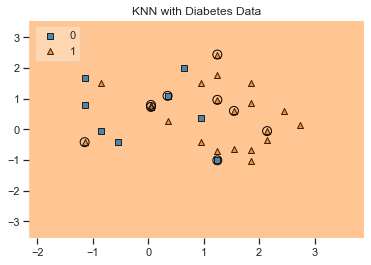

In [61]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('x')
#plt.ylabel('y')
plt.title('KNN with Diabetes Data')
plt.show()

# Statistical summary of the model

In [62]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     45.70
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           5.09e-60
Time:                        23:24:50   Log-Likelihood:                -369.68
No. Observations:                 768   AIC:                             757.4
Df Residuals:                     759   BIC:                             799.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**This is the summary of model with all the features included. The value of R squared indicates 32.5% variance is explained by this model. The P value for the feature Skin, insulin, age is more than 0.05 which is enough to accept the null hypothesis for these features. We need to make this model more accurate by selecting appropriate features.**

# By feature selection

As we know the ranking of the features so we will do the forward stepwise selction to find which combination of features gives the best result

In [63]:
features

['Glucose',
 'BMI',
 'Pregnancies',
 'DiabetesPedigreeFunction',
 'Age',
 'Insulin',
 'SkinThickness',
 'BloodPressure']

In [64]:
# First Imporant feature
from sklearn.model_selection import cross_val_score
for f in features:
    X = df[[f]]
    #X = X.values.reshape(-1, 1)
    cv_auc = cross_val_score(knn3, X, y.round(), cv=10, scoring='roc_auc').mean()
    print(f, cv_auc)

Glucose 0.743482905982906
BMI 0.6524629629629629
Pregnancies 0.6231467236467237
DiabetesPedigreeFunction 0.5408988603988603
Age 0.6668632478632478
Insulin 0.5943304843304843
SkinThickness 0.5752621082621082
BloodPressure 0.5362720797720798


In [65]:
# It is clear from the above result that glucose it the most important feature now wew will find second most imp feature
for f in features:
    if f not in ['Glucose']:
        X = df[['Glucose', f]]
        cv_auc = cross_val_score(knn3, X, y.round(), cv=10, scoring='roc_auc').mean()
        print(f, cv_auc)

BMI 0.794193732193732
Pregnancies 0.7650242165242165
DiabetesPedigreeFunction 0.7623789173789174
Age 0.7997478632478632
Insulin 0.7627535612535612
SkinThickness 0.7722977207977209
BloodPressure 0.7542692307692308


In [66]:
# Now second most important feature is Age lets find out third most important
for f in features:
    if f not in ['Glucose', 'Age']:
        X = df[['Glucose', 'Age', f]]
        cv_auc = cross_val_score(knn, X, y.round(), cv=10, scoring='roc_auc').mean()
        print(f, cv_auc)

BMI 0.815900284900285
Pregnancies 0.8002478632478633
DiabetesPedigreeFunction 0.8027763532763531
Insulin 0.8047549857549857
SkinThickness 0.8049330484330485
BloodPressure 0.797034188034188


In [67]:
# Now third most important feature is BMI lets find out fourth most important
for f in features:
    if f not in ['Glucose', 'Age', 'BMI']:
        X = df[['Glucose', 'Age', 'BMI', f]]
        cv_auc = cross_val_score(knn, X, y.round(), cv=10, scoring='roc_auc').mean()
        print(f, cv_auc)

Pregnancies 0.8255470085470085
DiabetesPedigreeFunction 0.8176410256410256
Insulin 0.8138347578347578
SkinThickness 0.8115868945868945
BloodPressure 0.8155498575498574


In [68]:
# Fourth most iportant feature is Pregnancies lets find fifth imp feature
for f in features:
    if f not in ['Glucose', 'Age', 'BMI', 'Pregnancies']:
        X = df[['Glucose', 'Age', 'BMI', 'Pregnancies', f]]
        cv_auc = cross_val_score(knn, X, y.round(), cv=10, scoring='roc_auc').mean()
        print(f, cv_auc)

DiabetesPedigreeFunction 0.8251025641025642
Insulin 0.8145569800569801
SkinThickness 0.8169188034188034
BloodPressure 0.8228561253561253


In [69]:
# Fifth most important feature is DiabetesPedigreeFunction let's find sixth imp feature
for f in features:
    if f not in ['Glucose', 'Age', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction']:
        X = df[['Glucose', 'Age', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', f]]
        cv_auc = cross_val_score(knn, X, y.round(), cv=10, scoring='roc_auc').mean()
        print(f, cv_auc)

Insulin 0.8150811965811965
SkinThickness 0.8170698005698005
BloodPressure 0.8228561253561253


In [70]:
# Sixth feature would be insuline and lets find the next one
for f in features:
    if f not in ['Glucose', 'Age', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure']:
        X = df[['Glucose', 'Age', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure', f]]
        cv_auc = cross_val_score(knn, X, y.round(), cv=10, scoring='roc_auc').mean()
        print(f, cv_auc)

Insulin 0.8161908831908832
SkinThickness 0.8098646723646723


the seventh feature would be Insuline and the eightth would be the SkinThickness.

**Now we know the ranking of the features so we will do the forward stepwise selction to find which combination of features gives the best result.**

# Forward stepwise selection

In [107]:
#Forward stepwise selection
ForwardSelection_CV = {'M1': ['Glucose'],
                       'M2': ['Glucose',  'Age'],
                       'M3': ['Glucose',  'Age', 'BMI'],
                       'M4': ['Glucose',  'Age', 'BMI', 'Pregnancies'],
                       'M5': ['Glucose',  'Age', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction'],
                       'M6': ['Glucose',  'Age', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure'],
                       'M7': ['Glucose',  'Age', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure', 'Insulin'],
                       'M8': ['Glucose',  'Age', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure', 'Insulin', 'SkinThickness']
                       }

In [103]:
for model in ForwardSelection_CV.keys():
    X = df[ForwardSelection_CV[model]]
    cv_auc = cross_val_score(knn3, X, y.round(), cv=10, scoring='roc_auc').mean()
    print(model, cv_auc)

M1 0.743482905982906
M2 0.7997478632478632
M3 0.8145427350427351
M4 0.8243817663817664
M5 0.8241866096866097
M6 0.8193447293447294
M7 0.8168703703703704
M8 0.8170427350427352


**The highest is obtain from fifth model which means that the 'Glucose',  'Age', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction' are the most important features**  

# Model Performance Analysis

Confusion Matrix The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.

**Confusion Matrix**  
We can see all the important values in what is called the Confusion Matrix (or Error Matrix or Table of Confusion).  
The Confusion Matrix is a table showing four values:  
• Datapoints we predicted positive that are actually positive  
• Datapoints we predicted positive that are actually negative  
• Datapoints we predicted negative that are actually positive  
• Datapoints we predicted negative that are actually negative  

The first and fourth are the datapoints we predicted correctly and the second and third are the datapoints we predicted incorrectly.  

In [74]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn3.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,145,22,167
1,33,56,89
All,178,78,256


In [75]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

Text(0.5, 12.5, 'Predicted label')

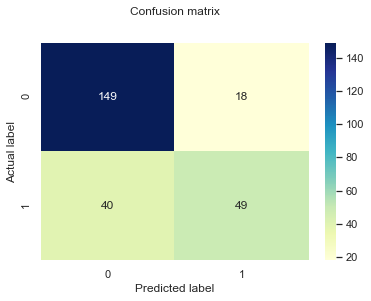

In [76]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

We can use the confusion matrix to compute the accuracy. As a reminder, the accuracy is the number of datapoints predicted correctly divided by the total number of datapoints.  

In [77]:
# accuracy
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7734375


In [78]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       167
           1       0.73      0.55      0.63        89

    accuracy                           0.77       256
   macro avg       0.76      0.72      0.73       256
weighted avg       0.77      0.77      0.76       256



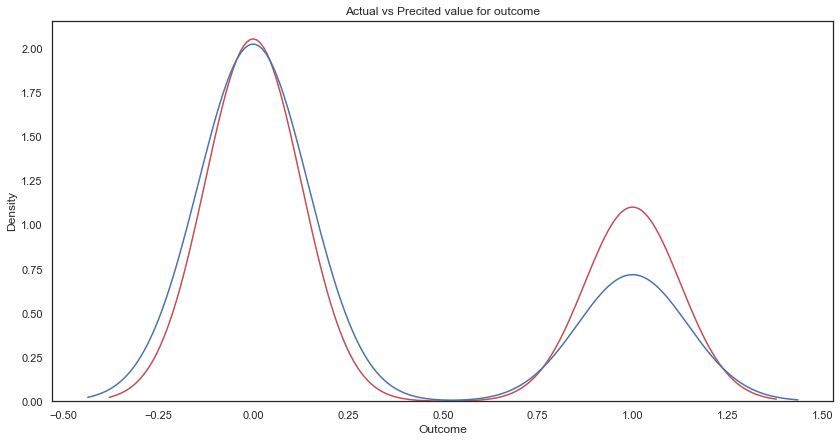

In [79]:
plt.figure(figsize=(14, 7))
ax = sns.distplot(df['Outcome'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

# ROC - AUC
ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

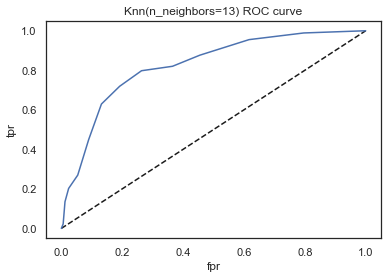

In [80]:
from sklearn.metrics import roc_curve
y_pred_proba = knn3.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=13) ROC curve')
plt.show()

In [81]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8236560586691785

# COMPARISION WITH OTHER ALGORITHMS

# Using Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
Y_pred = log_reg_model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.7734375


# Using SVC

In [83]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
pred_y = svc_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,pred_y))

Accuracy Score: 0.76171875


# Using Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion='entropy',random_state=7)
decision_tree_model.fit(X_train,y_train)
y_pred = decision_tree_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.70703125


# Using GaussianNB

In [85]:
from sklearn.naive_bayes import GaussianNB
Gaussian_NB_model = GaussianNB()
Gaussian_NB_model.fit(X_train, y_train)
y_pred = Gaussian_NB_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.71484375


# Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest_model = RandomForestClassifier(random_state=1)
Random_Forest_model.fit(X_train, y_train)
y_pred = Random_Forest_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test, y_pred))

Accuracy Score: 0.73046875


# Support Vector Machine
SVM with RBF kernal

In [87]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)
from sklearn.svm import SVC
svm_model=SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
y_pred=svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.76171875


# SVM with Linear Kernel

In [88]:
svm_kernal_model=SVC(kernel='linear')
svm_kernal_model.fit(X_train, y_train)
y_pred=svm_kernal_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7265625


In [89]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest','SVM with RBF kernal','SVM with Linear Kernel'],
    'Score': [0.73828125,0.82999,0.76171875,0.70703125,0.71484375,0.73046875,0.76171875, 0.7265625]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df)

                           Model
Score                           
0.829990                     KNN
0.761719                     SVC
0.761719     SVM with RBF kernal
0.738281     Logistic Regression
0.730469           Random Forest
0.726562  SVM with Linear Kernel
0.714844              GaussianNB
0.707031           Decision Tree


**KNN showed highier accuracy (82%) than the other algorithms**

# Loading and Saving a model

In [90]:
import pickle
# Save trained model to file
pickle.dump(knn3, open("Diabetes.pkl", "wb"))
loaded_model = pickle.load(open("Diabetes.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.79296875

In [95]:
Pregnancies = input()
Glucose = input()
BloodPressure = input()
SkinThickness = input()
Insulin = input()
BMI = input()
DiabetesPedigreeFunction = input()
Age = input()

33
22
44
55
66
77
88
33


In [96]:
row_df = pd.DataFrame([pd.Series([Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI ,DiabetesPedigreeFunction ,Age])])
row_df

,0,1,2,3,4,5,6,7
0,33,22,44,55,66,77,88,33


In [97]:
prob = loaded_model.predict_proba(row_df)[0][1]
print(f"The probability of you having Diabetes is {prob}")

The probability of you having Diabetes is 0.6153846153846154


In [98]:
loaded_model.predict(row_df)[0]

1